In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the dataset
df = pd.read_csv('transfusion.csv')

# Display first 5 rows
print(df.head())


   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  


In [14]:
# Print dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None


In [15]:
# Rename target column
df = df.rename(columns={'whether he/she donated blood in March 2007': 'Donated'})

# Verify the change
print(df.columns)

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'Donated'],
      dtype='object')


In [25]:
df.corr().style.background_gradient(cmap='coolwarm')

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Donated
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
Donated,-0.279869,0.218633,0.218633,-0.035854,1.000000


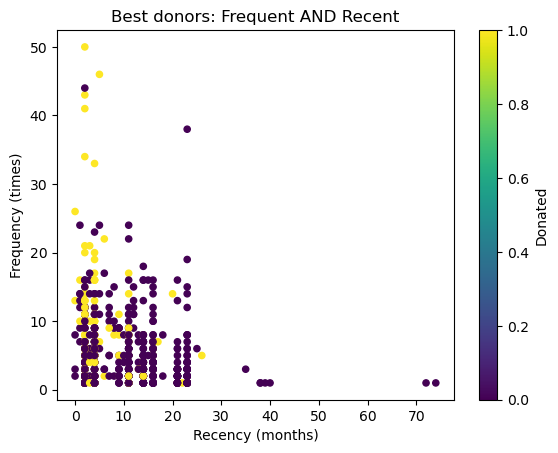

In [26]:
df.plot.scatter(
    x='Recency (months)', 
    y='Frequency (times)', 
    c='Donated', 
    colormap='viridis'
)
plt.title("Best donors: Frequent AND Recent")
plt.show()

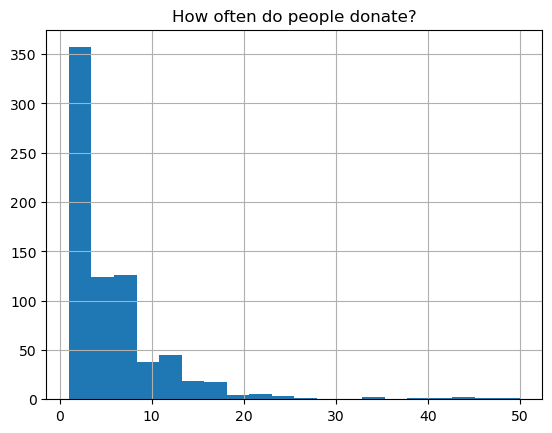

In [27]:
df['Frequency (times)'].hist(bins=20)
plt.title("How often do people donate?")
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_20476\1507292491.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['Recency_Group', 'Freq_Group'])['Donated'].mean().unstack()


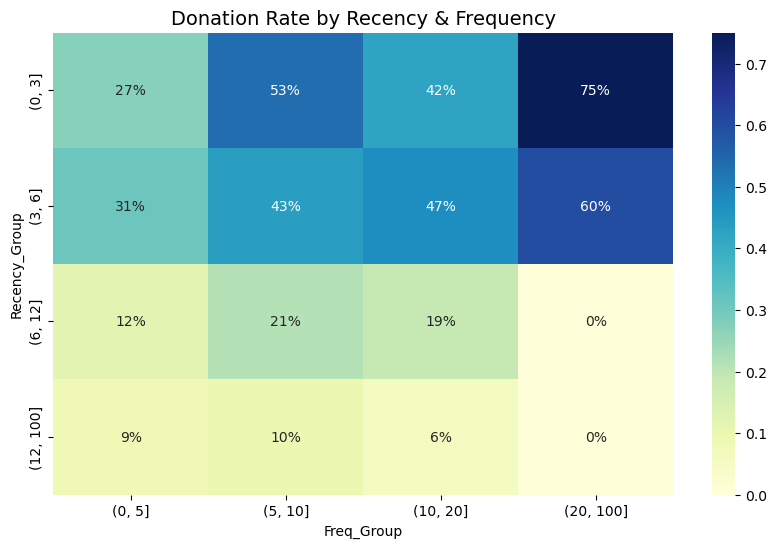

In [29]:
# Create groups
df['Recency_Group'] = pd.cut(df['Recency (months)'], bins=[0, 3, 6, 12, 100])
df['Freq_Group'] = pd.cut(df['Frequency (times)'], bins=[0, 5, 10, 20, 100])

# Plot
pivot = df.groupby(['Recency_Group', 'Freq_Group'])['Donated'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Donation Rate by Recency & Frequency", fontsize=14)
plt.show()

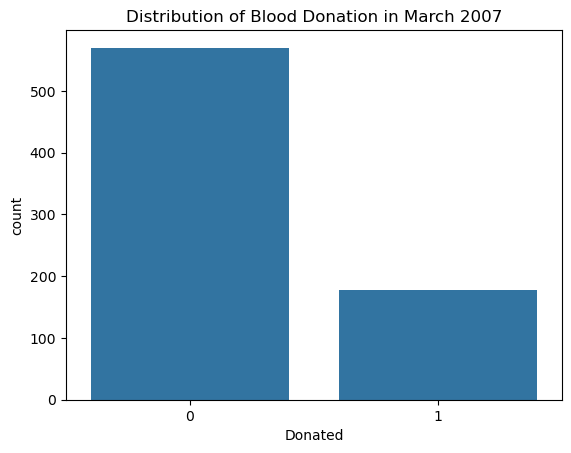

Donated
0    570
1    178
Name: count, dtype: int64


In [16]:
# Plot target distribution
sns.countplot(x='Donated', data=df)
plt.title('Distribution of Blood Donation in March 2007')
plt.show()

# Print class counts
print(df['Donated'].value_counts())

In [17]:
# Split into features and target
X = df.drop('Donated', axis=1)
y = df['Donated']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Train target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Train shape: (598, 4), Test shape: (150, 4)
Train target distribution:
Donated
0    456
1    142
Name: count, dtype: int64
Test target distribution:
Donated
0    114
1     36
Name: count, dtype: int64


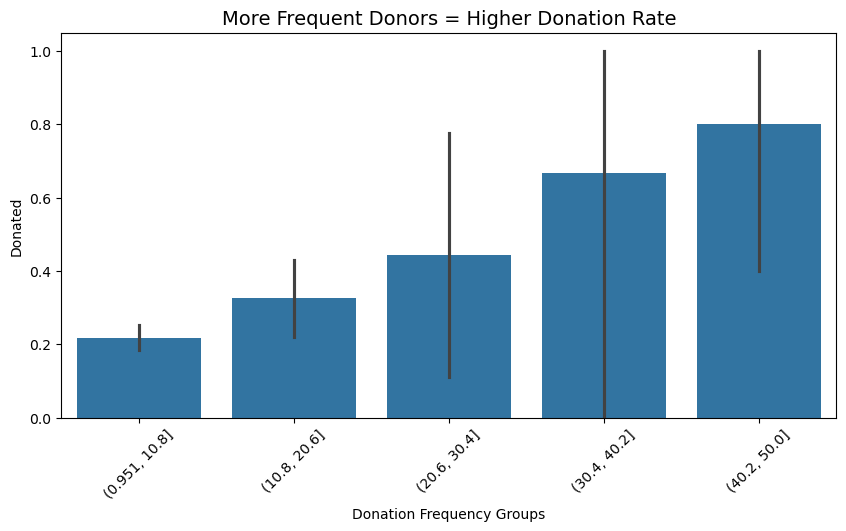

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x=pd.cut(df['Frequency (times)'], bins=5), y='Donated', data=df)
plt.title("More Frequent Donors = Higher Donation Rate", fontsize=14)
plt.xlabel("Donation Frequency Groups")
plt.xticks(rotation=45)
plt.show()

In [18]:
import tpot
print(tpot.__version__)  # Check your version

1.1.0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Initialize and tune a Random Forest model
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

# Get best model and predictions
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Random Forest AUC Score: {auc_score:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_sam

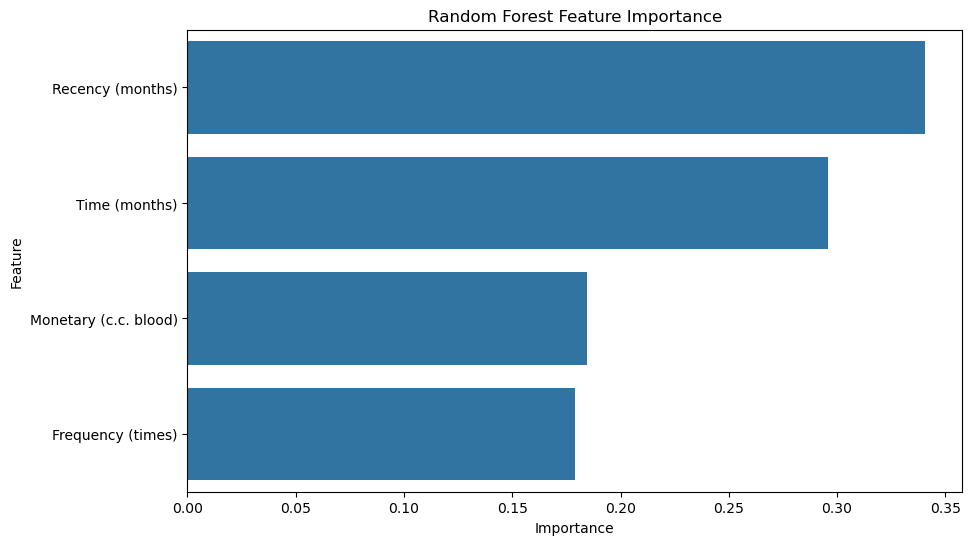

In [20]:
# Get feature importances from the best model
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}) \
               .sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Feature variances:
Monetary (c.c. blood)    2.131094e+06
Time (months)            5.942242e+02
Recency (months)         6.553543e+01
Frequency (times)        3.409751e+01
dtype: float64


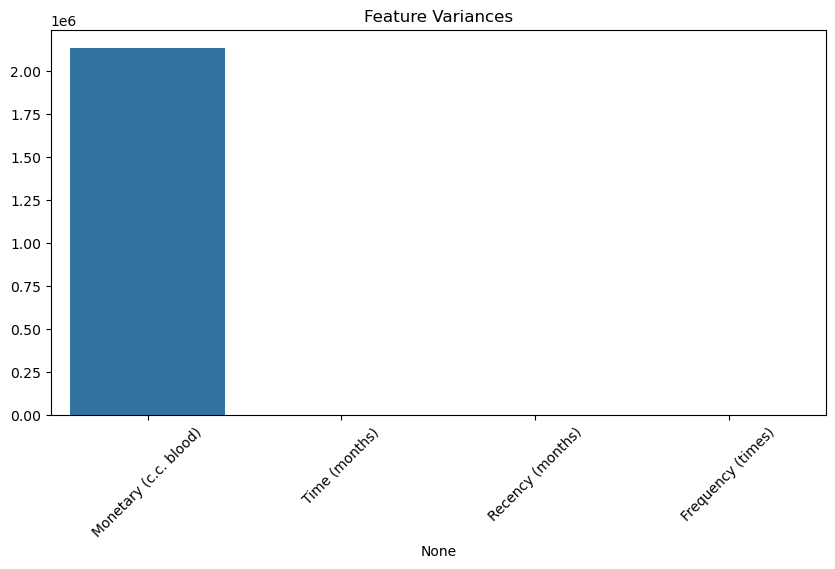

In [21]:
# Calculate and display feature variances
variances = X.var().sort_values(ascending=False)
print("Feature variances:")
print(variances)

# Plot feature variances
plt.figure(figsize=(10, 5))
sns.barplot(x=variances.index, y=variances.values)
plt.title('Feature Variances')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Apply log normalization to Monetary feature
X_train_log = X_train.copy()
X_test_log = X_test.copy()

X_train_log['Monetary (c.c. blood)'] = np.log1p(X_train_log['Monetary (c.c. blood)'])
X_test_log['Monetary (c.c. blood)'] = np.log1p(X_test_log['Monetary (c.c. blood)'])

# Verify transformation
print("\nAfter log transformation:")
print(X_train_log['Monetary (c.c. blood)'].var())


After log transformation:
0.8314208507558943


In [23]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_log)
X_test_scaled = scaler.transform(X_test_log)

# Train logistic regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Get predictions and AUC score
y_pred_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]
auc_score_log = roc_auc_score(y_test, y_pred_prob_log)

print(f"Logistic Regression AUC Score (with normalization): {auc_score_log:.4f}")

Logistic Regression AUC Score (with normalization): 0.7917


In [24]:
# Get Logistic Regression AUC (from your normalized version)
y_pred_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]
auc_score_log = roc_auc_score(y_test, y_pred_prob_log)

# Create comparison table
results = pd.DataFrame({
    'Model': ['Random Forest (GridSearch)', 'Logistic Regression (normalized)'],
    'AUC Score': [auc_score, auc_score_log]
}).sort_values('AUC Score', ascending=False)

print(results)

                              Model  AUC Score
1  Logistic Regression (normalized)   0.791667
0        Random Forest (GridSearch)   0.777534
